In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## `.plot()`

### We can use `.plot()` to visualise data in Pandas. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
* A relevant argument is `'kind'`, where you determine the kind of plot to produce. The options include:

  * ‘line’ : line plot (default)
  * ‘bar’ : vertical bar plot
  * ‘barh’ : horizontal bar plot
  * ‘hist’ : histogram
  * ‘box’ : boxplot
  * ‘kde’ : Kernel Density Estimation plot
  * ‘density’ : same as ‘kde’
  * ‘area’ : area plot
  * ‘pie’ : pie plot
  * ‘scatter’ : scatter plot (DataFrame only)
  * ‘hexbin’ : hexbin plot (DataFrame only)

To choose an appropriate argument for `kind` in this function requires an understanding of data types and how to visualise data. Experience gained through data projects will help with this.


In [22]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## `Line Plot`


In [28]:
df = sns.load_dataset('flights')
df = df.head(50)
print(df.shape)
df.head()

(50, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Instructions

We need to process the data for this exercise
  * First, we transform year and month to string using `.astype()`
  * Then we combine the strings in the pattern:  month - year, so that we can convert this pattern to date with `pd.to_datetime()`
  * We finally set Date as index with `.set_index()`

In [54]:
df['year'] = df['year'].astype('str')
df['month'] = df['month'].astype('str')
df['Date'] = pd.to_datetime(df['month']+ '-'+ df['year'])
df.set_index('Date', inplace=True)
df.head()

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_1854/1940421436.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['month']+ '-'+ df['year'])


,year,month,passengers
Date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [90]:
df.groupby('year').passengers.mean().round()

year
1949    127.0
1950    140.0
1951    170.0
1952    197.0
1953    196.0
Name: passengers, dtype: float64

### To produce a **line plot** where `y` values are passengers, and `x` values are Date.
  * By default, `x` is the index. In case you want another variable, you can specify it.
  * figsize is a tuple to set plot height, and width (Size of the graph)
  * xlabel is x-axis label
  * ylabel is y-axis label
  * title is plot title.

* **plt.show()**
  * `plt.show()` gives the command to plot.

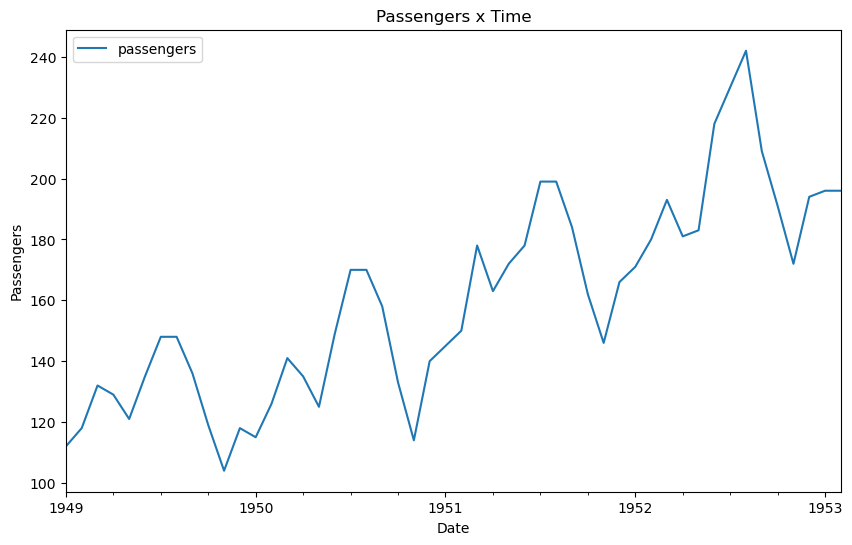

In [74]:
df.plot(kind='line',
        x= 'year',
        y='passengers',
        figsize=(10,6),
        title='Passengers x Time', 
        xlabel='Date', ylabel='Passengers'
        )
plt.show()

### We can process the data and look for the average levels over the years
  * We first groupby year, set `as_index=False`
  * Then aggregate and create AvgLevels as the mean of passengers
  * Finally, we create a line plot, indicating x and y. We just used one argument here: figsize

* We notice a trend that passengers' levels increased over time.
  * We can't state definitively that the levels increased simply by plotting. We need statistical tests for that, which we will learn in future lessons. This plot just helps to see a trend over the years and that the trend is upwards

### Creating chart using Groupby

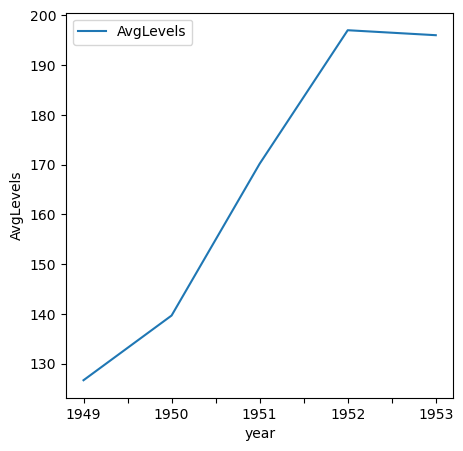

In [82]:
# To get the chart on the average number of passengers per year

(df
 .groupby(by=['year'], as_index=False) # After Groupby, setting 'as_index = False' is important
 .agg(AvgLevels=('passengers','mean'))
 .plot(kind='line', x='year',ylabel='AvgLevels', figsize=(5,5))
 )
plt.show()

In [112]:
np.random.randint(low=-10, high=20, size=df.shape[0])

array([ -5,   2,   8,   4,  14,   2,  -2,  10,  19,  -4,  11,  -7,   7,
        13,  -9,  -6,  -1,   1,   3,  18,  -8,   1,  18,   5,   4,   6,
        18,   9,   2,  14,  14, -10,  -9,  16,   1,  -9,   4,  -6,   7,
        -3,  -4,   7,  12,  16,   9,  -9,  14,   3,  -8,  13])

In [122]:
df['Col1'] = 300 + 20 * np.random.randn(df.shape[0]) + np.random.randint(low=-10, high=20, size=df.shape[0])
df.head()

,year,month,passengers,Col1
Date,,,,
1949-01-01,1949,Jan,112,326.181878
1949-02-01,1949,Feb,118,275.604986
1949-03-01,1949,Mar,132,259.674373
1949-04-01,1949,Apr,129,299.805329
1949-05-01,1949,May,121,288.947119


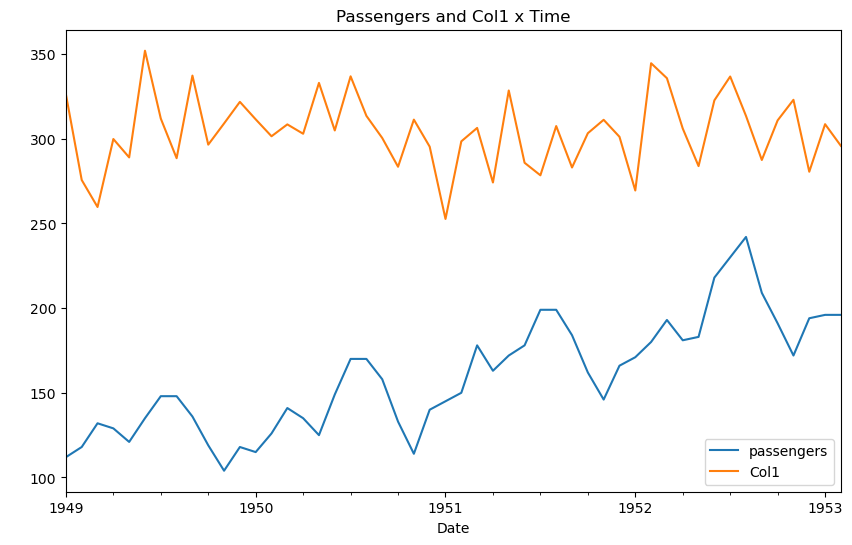

In [132]:
# Using multiple Columns on Y-axis. (In other words, Parse a list for y, containing passengers and Col1)

df.plot(kind='line',y=['passengers','Col1'],
        figsize=(10,6),
        title='Passengers and Col1 x Time', xlabel='Date', ylabel=' '
        )
plt.show()

In [134]:
df_practice = pd.read_csv("/Users/raihannasir/Documents/Pandas/New Materials/CarPrice_Assignment.csv")
df_practice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


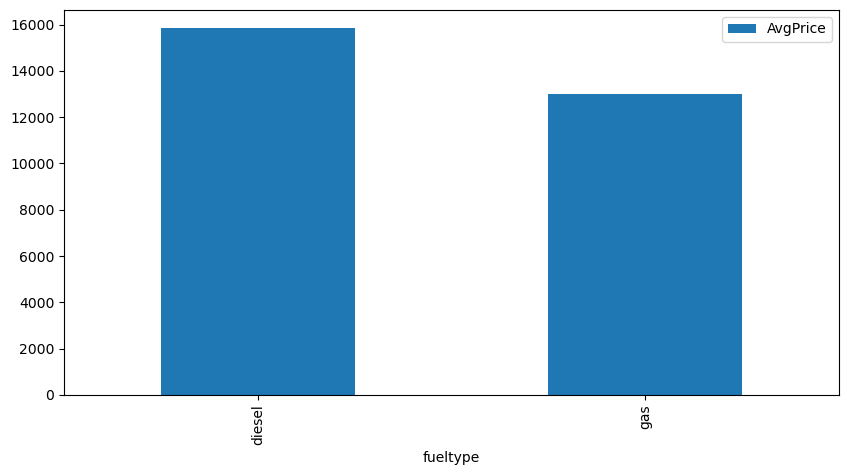

In [136]:
(df_practice
 .groupby('fueltype', as_index=False)  # After Groupby, setting 'as_index = False' is important
 .agg(AvgPrice=('price', 'mean'))
 .plot(kind='bar', x='fueltype', y='AvgPrice', figsize=(10,5))
)
plt.show()